## Convolutional Neural Network Using SVM as Final Layer

### Understanding Of SVM

- Part 1: https://www.youtube.com/watch?v=H9yACitf-KM
- Part 2: https://www.youtube.com/watch?v=Js3GLb1xPhc

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.8.0'

In [4]:
#install kaggle
!pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madhuritigga","key":"a850d75a1a81418aa8e99831c4d5f799"}'}

In [6]:
#create a kaggle folder
! mkdir ~/.kaggle

In [7]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [8]:
#Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                                       title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                               1KB  2022-03-21 10:24:45           2132        157  1.0              
datasets/prasertk/healthy-lifestyle-cities-report-2021                    Healthy Lifestyle Cities Report 2021                  2KB  2022-03-03 00:26:02           2536         82  1.0              
datasets/prasertk/netflix-daily-top-10-in-us                              Netflix daily top 10                                 70KB  2022-03-12 13:22:19           1072         29  1.0              
datasets/v

In [10]:
!kaggle datasets download -d minhhuy2810/rice-diseases-image-dataset/RiceDiseaseDataset

100% 12.0G/12.0G [02:06<00:00, 174MB/s]
100% 12.0G/12.0G [02:06<00:00, 102MB/s]


In [11]:
!unzip rice-diseases-image-dataset.zip -d Data

Streaming output truncated to the last 5000 lines.
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_20190424_133840.jpg  
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_20190424_133841.jpg  
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_20190424_133953.jpg  
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_20190424_133956.jpg  
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_20190424_134124.jpg  
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_20190424_134125.jpg  
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_20190424_134126.jpg  
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_20190424_134128.jpg  
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_20190424_134129.jpg  
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_20190424_134130.jpg  
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_2992.jpg  
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_2993.jpg  
  inflating: Data/LabelledRice/Labelled/BrownSpot/IMG_2998.

In [12]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [13]:
training_set = train_datagen.flow_from_directory('/content/Data/RiceDiseaseDataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/Data/RiceDiseaseDataset/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1600 images belonging to 4 classes.
Found 492 images belonging to 4 classes.


In [14]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [15]:
from tensorflow.keras.regularizers import l2

In [17]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
#cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
 #            ='softmax'))

In [18]:
## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [20]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
#r=cnn.fit_generator(training_set, steps_per_epoch=50, epochs=10, verbose=1, validation_data=test_set, validation_steps=15.375)
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
50/50 [==============================] - 246s 5s/step - loss: 1.4347 - accuracy: 0.2500 - val_loss: 1.4126 - val_accuracy: 0.2500
Epoch 2/10
50/50 [==============================] - 230s 5s/step - loss: 1.3986 - accuracy: 0.2500 - val_loss: 1.3861 - val_accuracy: 0.2500
Epoch 3/10
50/50 [==============================] - 225s 5s/step - loss: 1.3774 - accuracy: 0.2500 - val_loss: 1.3696 - val_accuracy: 0.2500
Epoch 4/10
50/50 [==============================] - 225s 5s/step - loss: 1.3638 - accuracy: 0.2500 - val_loss: 1.3584 - val_accuracy: 0.2500
Epoch 5/10
50/50 [==============================] - 225s 5s/step - loss: 1.3542 - accuracy: 0.2500 - val_loss: 1.3500 - val_accuracy: 0.2500
Epoch 6/10
50/50 [==============================] - 226s 5s/step - loss: 1.3467 - accuracy: 0.2500 - val_loss: 1.3433 - val_accuracy: 0.2500
Epoch 7/10
50/50 [==============================] - 225s 5s/step - loss: 1.3405 - accuracy: 0.2469 - val_loss: 1.3375 - val_accuracy: 0.2500
Epoch 8/10
50

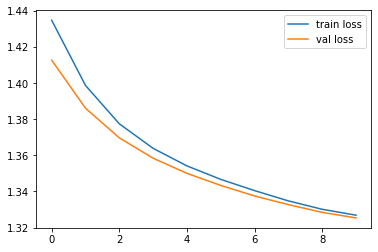

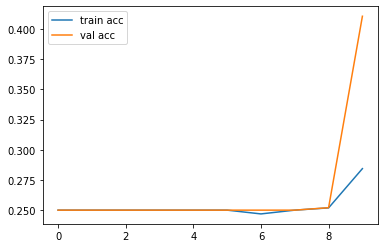

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')